In [191]:
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Polygon
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
talence_iris_data = pd.read_excel('result/talence_iris_data.xlsx')

In [4]:
overlap_zone_data = pd.read_excel('result/overlap_zone_talence.xlsx') 

In [5]:
overlap_zone_data.head()

,bdv_id,DCOMIRIS,NOM_IRIS,overlap_percentage
0,0,335220102,La Fauvette,32.044260
1,0,335220105,Cauderes,18.267020
2,0,335220101,Poste-Mairie,18.729996
3,1,335220102,La Fauvette,33.000796
4,1,335220108,Peylanne-Leysotte,13.938283


In [6]:
talence_iris_data.head(2)

,DCOMIRIS,DEPCOM,IRIS,NOM_COM,NOM_IRIS,TYP_IRIS,Population,Agriculteurs,Artisans,Cadres,Prof_intermediaires,Employes,Ouvriers,Chomeurs,Retraites,Proprietaire,Immigrant
0,335220112,33522,112,Talence,Thouars 2,H,1276,0,21,161,237,253,200,214,76,654,172
1,335220102,33522,102,Talence,La Fauvette,H,2824,0,69,498,625,471,177,219,126,1807,269


In [9]:
overlap_full_data = pd.merge(overlap_zone_data, talence_iris_data, on=["DCOMIRIS","NOM_IRIS"], how="left")

In [10]:
overlap_full_data

,bdv_id,DCOMIRIS,NOM_IRIS,overlap_percentage,DEPCOM,IRIS,NOM_COM,TYP_IRIS,Population,Agriculteurs,Artisans,Cadres,Prof_intermediaires,Employes,Ouvriers,Chomeurs,Retraites,Proprietaire,Immigrant
0,0,335220102,La Fauvette,32.044260,33522,102,Talence,H,2824,0,69,498,625,471,177,219,126,1807,269
1,0,335220105,Cauderes,18.267020,33522,105,Talence,H,2258,5,79,501,544,297,148,125,147,2027,131
2,0,335220101,Poste-Mairie,18.729996,33522,101,Talence,H,3736,0,72,563,630,667,290,432,167,1739,508
3,1,335220102,La Fauvette,33.000796,33522,102,Talence,H,2824,0,69,498,625,471,177,219,126,1807,269
4,1,335220108,Peylanne-Leysotte,13.938283,33522,108,Talence,H,2635,0,77,501,584,506,135,200,205,1580,249
5,1,335220109,Plume-La-Boule,14.727235,33522,109,Talence,H,2883,0,65,399,603,540,263,245,235,2075,258
6,1,335220101,Poste-Mairie,6.227958,33522,101,Talence,H,3736,0,72,563,630,667,290,432,167,1739,508
7,2,335220102,La Fauvette,53.862619,33522,102,Talence,H,2824,0,69,498,625,471,177,219,126,1807,269
8,2,335220108,Peylanne-Leysotte,17.027056,33522,108,Talence,H,2635,0,77,501,584,506,135,200,205,1580,249
9,2,335220105,Cauderes,0.394526,33522,105,Talence,H,2258,5,79,501,544,297,148,125,147,2027,131


In [82]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([2,3]).reshape([2,1])

In [83]:
y = y/100.0
y

array([[ 0.02],
       [ 0.03]])

In [37]:
np.multiply(x,y)

array([[ 2,  4,  6],
       [12, 15, 18]])

In [99]:
def aggregate_row(df, variable_list, overlap_percentage_col):
    new_df = df.copy()
    df_len = df.shape[0]
    variable_array = new_df[variable_list]
    percentage_array = new_df[overlap_percentage_col].values.reshape([df_len,1])
    percentage_array = percentage_array/100.0
    new_variable_array = np.around(np.multiply(variable_array, percentage_array))
    new_df[variable_list] = new_variable_array
    return new_df

In [103]:
variable_list = overlap_full_data.columns.tolist()[-11:] 
overlap_percentage_col = 'overlap_percentage'
overlap_full_data = aggregate_row(overlap_full_data, variable_list, overlap_percentage_col)

In [104]:
overlap_full_data.head()

,bdv_id,DCOMIRIS,NOM_IRIS,overlap_percentage,DEPCOM,IRIS,NOM_COM,TYP_IRIS,Population,Agriculteurs,Artisans,Cadres,Prof_intermediaires,Employes,Ouvriers,Chomeurs,Retraites,Proprietaire,Immigrant
0,0,335220102,La Fauvette,32.044260,33522,102,Talence,H,905,0,22,160,200,151,57,70,40,579,86
1,0,335220105,Cauderes,18.267020,33522,105,Talence,H,412,1,14,92,99,54,27,23,27,370,24
2,0,335220101,Poste-Mairie,18.729996,33522,101,Talence,H,700,0,13,105,118,125,54,81,31,326,95
3,1,335220102,La Fauvette,33.000796,33522,102,Talence,H,932,0,23,164,206,155,58,72,42,596,89
4,1,335220108,Peylanne-Leysotte,13.938283,33522,108,Talence,H,367,0,11,70,81,71,19,28,29,220,35


In [115]:
def aggregate_data(df, variable_list, aggregate_variable):
    new_df = df.copy()
    new_df = new_df[variable_list].groupby(new_df[aggregate_variable])
    new_df = new_df.aggregate(np.sum).reset_index()
    return new_df

In [119]:
overlap_aggregate_data = aggregate_data(overlap_full_data, variable_list, 'bdv_id')

In [120]:
overlap_aggregate_data

,bdv_id,Population,Agriculteurs,Artisans,Cadres,Prof_intermediaires,Employes,Ouvriers,Chomeurs,Retraites,Proprietaire,Immigrant
0,0,2017,1,49,357,417,330,138,174,98,1275,205
1,1,1957,0,48,328,415,348,134,163,116,1230,194
2,2,1979,0,50,355,438,341,119,152,104,1250,188
3,3,3008,0,57,422,489,534,239,337,124,1285,427
4,4,1088,2,50,218,219,198,61,109,64,845,95
5,5,1256,5,35,226,233,241,95,136,64,887,129
6,6,1531,1,47,266,283,277,105,166,79,940,172
7,7,709,0,40,151,151,124,32,67,46,584,54
8,8,1763,0,66,341,348,303,105,158,81,1065,171
9,9,1687,0,42,322,326,278,115,118,38,679,171


In [121]:
def calculate_percentage(data, population_variable, variable_list): 
    new_data = data.copy()
    for variable in variable_list:
        new_data[variable] = 100.0*new_data[variable]/data[population]
    return new_data

In [138]:
variable_list = overlap_aggregate_data.columns.tolist()[2:] 
overlap_aggregate_percentage = calculate_percentage(overlap_aggregate_data, 'Population', variable_list)
overlap_aggregate_percentage

,bdv_id,Population,Agriculteurs,Artisans,Cadres,Prof_intermediaires,Employes,Ouvriers,Chomeurs,Retraites,Proprietaire,Immigrant
0,0,2017,0.049579,2.429351,17.699554,20.674269,16.360932,6.841844,8.626673,4.858701,63.212692,10.163609
1,1,1957,0.000000,2.452734,16.760347,21.205927,17.782320,6.847215,8.329075,5.927440,62.851303,9.913132
2,2,1979,0.000000,2.526529,17.938353,22.132390,17.230925,6.013138,7.680647,5.255179,63.163214,9.499747
3,3,3008,0.000000,1.894947,14.029255,16.256649,17.752660,7.945479,11.203457,4.122340,42.719415,14.195479
4,4,1088,0.183824,4.595588,20.036765,20.128676,18.198529,5.606618,10.018382,5.882353,77.665441,8.731618
5,5,1256,0.398089,2.786624,17.993631,18.550955,19.187898,7.563694,10.828025,5.095541,70.621019,10.270701
6,6,1531,0.065317,3.069889,17.374265,18.484651,18.092750,6.858263,10.842587,5.160026,61.397779,11.234487
7,7,709,0.000000,5.641749,21.297602,21.297602,17.489422,4.513399,9.449929,6.488011,82.369535,7.616361
8,8,1763,0.000000,3.743619,19.342031,19.739081,17.186614,5.955757,8.961997,4.594441,60.408395,9.699376
9,9,1687,0.000000,2.489627,19.087137,19.324244,16.478957,6.816835,6.994665,2.252519,40.248963,10.136337


In [134]:
import ast
def txt_to_df(file):
    txt = [line.rstrip('\n') for line in open(file)]
    txt = ''.join(txt)
    lst = ast.literal_eval(txt)
    
    df = geopandas.GeoDataFrame(columns = ['geometry'])
    df.crs= {'init': 'epsg:4326', 'no_defs': True}
    
    for poly in lst:
        geom = Polygon(poly)
        df.loc[len(df)] = geom
        
        
    return df

In [135]:
def reverse_coord(df):
    new_df = df.copy()
    new_df.drop('geometry', axis=1, inplace=True)
    new_geometry = []
    for pol in df.geometry:
        lat, lon = pol.exterior.coords.xy
        new_pol = Polygon([(x,y) for x,y in zip(lon,lat)])
        new_geometry.append(new_pol)
    new_df['geometry'] = new_geometry
    return new_df

In [136]:
bureau_vote_lonlat = txt_to_df('Geospatial analysis//data/bdv.txt')
bureau_vote_latlon = reverse_coord(bureau_vote_lonlat)

In [144]:
bureau_vote_latlon.head()

,geometry
0,"POLYGON ((-0.588413 44.807702, -0.586268 44.80..."
1,"POLYGON ((-0.5840919999999999 44.802496, -0.58..."
2,"POLYGON ((-0.584997 44.808468, -0.578787000000..."
3,"POLYGON ((-0.60165 44.80826, -0.594673 44.8034..."
4,"POLYGON ((-0.590767 44.82018, -0.587901 44.818..."


In [140]:
overlap_aggregate_percentage = pd.merge(overlap_aggregate_percentage, bureau_vote_latlon, left_index=True, right_index=True)

In [143]:
overlap_aggregate_percentage.head()

,bdv_id,Population,Agriculteurs,Artisans,Cadres,Prof_intermediaires,Employes,Ouvriers,Chomeurs,Retraites,Proprietaire,Immigrant,geometry
0,0,2017,0.049579,2.429351,17.699554,20.674269,16.360932,6.841844,8.626673,4.858701,63.212692,10.163609,"POLYGON ((-0.588413 44.807702, -0.586268 44.80..."
1,1,1957,0.000000,2.452734,16.760347,21.205927,17.782320,6.847215,8.329075,5.927440,62.851303,9.913132,"POLYGON ((-0.5840919999999999 44.802496, -0.58..."
2,2,1979,0.000000,2.526529,17.938353,22.132390,17.230925,6.013138,7.680647,5.255179,63.163214,9.499747,"POLYGON ((-0.584997 44.808468, -0.578787000000..."
3,3,3008,0.000000,1.894947,14.029255,16.256649,17.752660,7.945479,11.203457,4.122340,42.719415,14.195479,"POLYGON ((-0.60165 44.80826, -0.594673 44.8034..."
4,4,1088,0.183824,4.595588,20.036765,20.128676,18.198529,5.606618,10.018382,5.882353,77.665441,8.731618,"POLYGON ((-0.590767 44.82018, -0.587901 44.818..."


In [148]:
overlap_aggregate_percentage = geopandas.GeoDataFrame(overlap_aggregate_percentage)

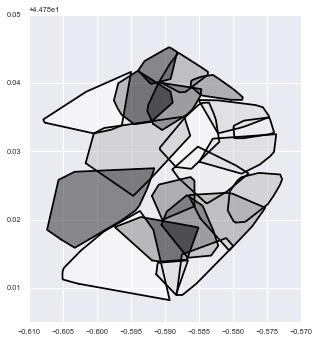

In [195]:
overlap_aggregate_percentage.plot()

In [153]:
overlap_aggregate_percentage.describe()

,bdv_id,Population,Agriculteurs,Artisans,Cadres,Prof_intermediaires,Employes,Ouvriers,Chomeurs,Retraites,Proprietaire,Immigrant
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,10.000000,1592.333333,0.062965,2.838406,15.754874,19.195142,17.960928,8.347209,9.748343,5.408848,58.168269,12.269222
std,6.204837,598.571410,0.108065,0.936158,4.874989,3.155412,2.258090,3.449949,2.515753,1.440947,18.411012,5.364748
min,0.000000,522.000000,0.000000,1.761905,4.955401,12.489557,13.180272,4.513399,5.527211,2.252519,25.438596,5.782313
25%,5.000000,1176.000000,0.000000,2.380952,12.925170,17.940415,17.186614,6.513410,8.071217,4.594441,46.043851,9.446254
50%,10.000000,1685.000000,0.000000,2.526529,17.374265,19.324244,17.782320,6.858263,10.018382,5.699482,60.408395,10.163609
75%,15.000000,1979.000000,0.083542,3.069889,19.087137,21.297602,19.187898,9.983292,11.095238,6.462585,65.994065,14.195479
max,20.000000,3008.000000,0.398089,5.641749,22.193878,24.064626,23.191278,18.434093,14.965312,7.952522,89.795918,26.957384


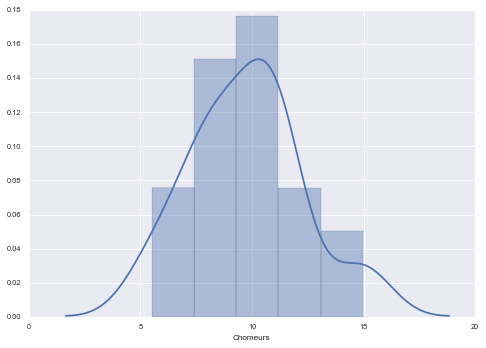

In [196]:
sns.distplot(overlap_aggregate_percentage['Chomeurs'])

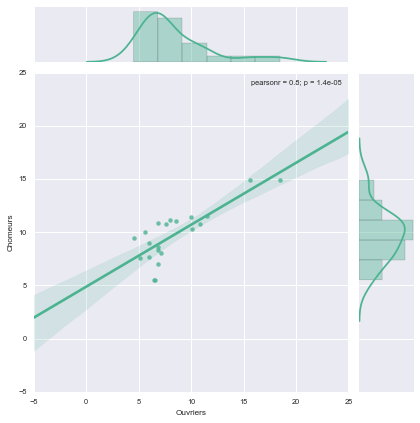

In [200]:
plt.figure(figsize=(12, 10))
sns.jointplot(overlap_aggregate_percentage['Ouvriers'],overlap_aggregate_percentage['Chomeurs'], kind='reg',color="#4CB391")

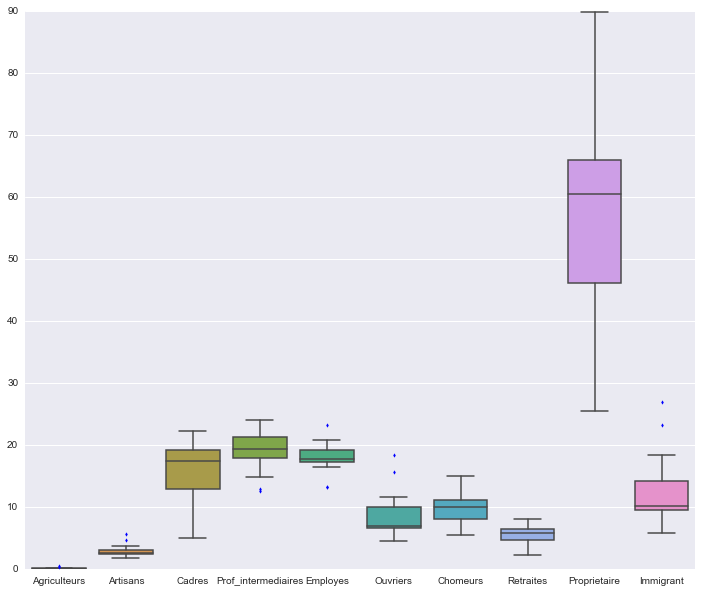

In [207]:
plt.figure(figsize=(12, 10))
sns.boxplot(overlap_aggregate_percentage[overlap_aggregate_percentage.columns[2:12]])
sns.set(font_scale=.8)

In [209]:
overlap_aggregate_percentage.to_file('result/overlap_aggregate_data', driver="ESRI Shapefile")

In [ ]:
overlap_aggregate_percentage_no_geometry = overlap_aggregate_percentage_no_geometry.drop('geometry', axis=1)
writer = pd.ExcelWriter('result/overlap_aggregate_data.xlsx')
talence_iris_data_no_geometry.to_excel(writer,'Sheet1')
writer.save()